## 내 구글 드라이브 마운팅
본인 구글 내 데이터 사용

In [0]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


## 선수정보, 연봉, 타자, 투수, 팀 데이터 읽어오기

In [0]:
import pandas as pd
player=pd.read_csv('/content/drive/My Drive/통계적방법19_박초연/People.csv')
salary=pd.read_csv('/content/drive/My Drive/통계적방법19_박초연/Salaries.csv')
batter=pd.read_csv('/content/drive/My Drive/통계적방법19_박초연/Batting.csv')
pitcher=pd.read_csv('/content/drive/My Drive/통계적방법19_박초연/Pitching.csv')
team=pd.read_csv('/content/drive/My Drive/통계적방법19_박초연/Teams.csv')

## 만든 데이터프레임 변수명 출력

In [0]:
print('선수정보',player.columns,'\n연봉',salary.columns,
'\n타자',batter.columns,'\n투수',pitcher.columns,'\n팀',team.columns)

선수정보 Index(['playerID', 'birthYear', 'birthMonth', 'birthDay', 'birthCountry',
       'birthState', 'birthCity', 'deathYear', 'deathMonth', 'deathDay',
       'deathCountry', 'deathState', 'deathCity', 'nameFirst', 'nameLast',
       'nameGiven', 'weight', 'height', 'bats', 'throws', 'debut', 'finalGame',
       'retroID', 'bbrefID'],
      dtype='object') 
연봉 Index(['yearID', 'teamID', 'lgID', 'playerID', 'salary'], dtype='object') 
타자 Index(['playerID', 'yearID', 'stint', 'teamID', 'lgID', 'G', 'AB', 'R', 'H',
       '2B', '3B', 'HR', 'RBI', 'SB', 'CS', 'BB', 'SO', 'IBB', 'HBP', 'SH',
       'SF', 'GIDP'],
      dtype='object') 
투수 Index(['playerID', 'yearID', 'stint', 'teamID', 'lgID', 'W', 'L', 'G', 'GS',
       'CG', 'SHO', 'SV', 'IPouts', 'H', 'ER', 'HR', 'BB', 'SO', 'BAOpp',
       'ERA', 'IBB', 'WP', 'HBP', 'BK', 'BFP', 'GF', 'R', 'SH', 'SF', 'GIDP'],
      dtype='object') 
팀 Index(['yearID', 'lgID', 'teamID', 'franchID', 'divID', 'Rank', 'G', 'Ghome',
       'W', 'L', 'DivWin'

## 만든 데이터프레임 크기 보기

In [0]:
print('선수정보',player.shape,'\n연봉',salary.shape,'\n타자',batter.shape,
'\n투수',pitcher.shape,'\n팀',team.shape)

선수정보 (19617, 24) 
연봉 (26428, 5) 
타자 (105861, 22) 
투수 (46699, 30) 
팀 (2895, 48)


## 선수정보 + 연봉정보 합치기 (선수_연봉)
합친 데이터프레임 이름 : (선수_연봉) ps

In [0]:
ps=pd.merge(salary,player,on='playerID',how='inner')
ps.sort_values(['yearID','playerID'],inplace=True)
print(ps.shape,'\n',ps.columns)

(26428, 28) 
 Index(['yearID', 'teamID', 'lgID', 'playerID', 'salary', 'birthYear',
       'birthMonth', 'birthDay', 'birthCountry', 'birthState', 'birthCity',
       'deathYear', 'deathMonth', 'deathDay', 'deathCountry', 'deathState',
       'deathCity', 'nameFirst', 'nameLast', 'nameGiven', 'weight', 'height',
       'bats', 'throws', 'debut', 'finalGame', 'retroID', 'bbrefID'],
      dtype='object')


## 타자 정보 + 선수_연봉정보 합치기

In [0]:
bat=pd.merge(ps,batter,on=['yearID','playerID'],how='inner')
print(bat.shape,'\n',bat.columns)

(28294, 48) 
 Index(['yearID', 'teamID_x', 'lgID_x', 'playerID', 'salary', 'birthYear',
       'birthMonth', 'birthDay', 'birthCountry', 'birthState', 'birthCity',
       'deathYear', 'deathMonth', 'deathDay', 'deathCountry', 'deathState',
       'deathCity', 'nameFirst', 'nameLast', 'nameGiven', 'weight', 'height',
       'bats', 'throws', 'debut', 'finalGame', 'retroID', 'bbrefID', 'stint',
       'teamID_y', 'lgID_y', 'G', 'AB', 'R', 'H', '2B', '3B', 'HR', 'RBI',
       'SB', 'CS', 'BB', 'SO', 'IBB', 'HBP', 'SH', 'SF', 'GIDP'],
      dtype='object')


## 투수 정보 + 선수_연봉정보 합치기

In [0]:
pitch=pd.merge(ps,pitcher,on=['yearID','playerID'],how='inner')
print(pitch.shape,'\n',pitch.columns)

(13365, 56) 
 Index(['yearID', 'teamID_x', 'lgID_x', 'playerID', 'salary', 'birthYear',
       'birthMonth', 'birthDay', 'birthCountry', 'birthState', 'birthCity',
       'deathYear', 'deathMonth', 'deathDay', 'deathCountry', 'deathState',
       'deathCity', 'nameFirst', 'nameLast', 'nameGiven', 'weight', 'height',
       'bats', 'throws', 'debut', 'finalGame', 'retroID', 'bbrefID', 'stint',
       'teamID_y', 'lgID_y', 'W', 'L', 'G', 'GS', 'CG', 'SHO', 'SV', 'IPouts',
       'H', 'ER', 'HR', 'BB', 'SO', 'BAOpp', 'ERA', 'IBB', 'WP', 'HBP', 'BK',
       'BFP', 'GF', 'R', 'SH', 'SF', 'GIDP'],
      dtype='object')


In [0]:
pitch.head(10)

,yearID,teamID_x,lgID_x,playerID,salary,birthYear,birthMonth,birthDay,birthCountry,birthState,birthCity,deathYear,deathMonth,deathDay,deathCountry,deathState,deathCity,nameFirst,nameLast,nameGiven,weight,height,bats,throws,debut,finalGame,retroID,bbrefID,stint,teamID_y,lgID_y,W,L,G,GS,CG,SHO,SV,IPouts,H,ER,HR,BB,SO,BAOpp,ERA,IBB,WP,HBP,BK,BFP,GF,R,SH,SF,GIDP
0,1985,TOR,AL,ackerji01,170000,1958.0,9.0,24.0,USA,TX,Freer,NaN,NaN,NaN,NaN,NaN,NaN,Jim,Acker,James Justin,210.0,74.0,R,R,1983-04-07,1992-06-14,ackej001,ackerji01,1,TOR,AL,7,2,61,0,0,0,10,259,86,31,7,43,42,0.268,3.23,1.0,2,3.0,0,370.0,26,35,1.0,2.0,16.0
1,1985,CHA,AL,agostju01,147500,1958.0,2.0,23.0,P.R.,NaN,Rio Piedras,NaN,NaN,NaN,NaN,NaN,NaN,Juan,Agosto,Juan Roberto,190.0,74.0,L,L,1981-09-07,1993-06-19,agosj001,agostju01,1,CHA,AL,4,3,54,0,0,0,1,181,45,24,3,23,39,0.210,3.58,1.0,0,3.0,0,246.0,21,27,3.0,3.0,4.0
2,1985,TOR,AL,alexado01,875000,1950.0,9.0,4.0,USA,AL,Cordova,NaN,NaN,NaN,NaN,NaN,NaN,Doyle,Alexander,Doyle Lafayette,190.0,75.0,R,R,1971-06-26,1989-09-27,alexd001,alexado01,1,TOR,AL,17,10,36,36,6,1,0,782,268,100,28,67,142,0.266,3.45,0.0,9,6.0,0,1090.0,0,105,6.0,3.0,15.0
3,1985,SLN,NL,allenne01,750000,1958.0,1.0,24.0,USA,KS,Kansas City,NaN,NaN,NaN,NaN,NaN,NaN,Neil,Allen,Neil Patrick,185.0,75.0,R,R,1979-04-15,1989-09-19,allen001,allenne01,1,SLN,NL,1,4,23,1,0,0,2,87,32,18,3,17,10,0.283,5.59,6.0,1,1.0,1,135.0,13,22,1.0,3.0,3.0
4,1985,SLN,NL,allenne01,750000,1958.0,1.0,24.0,USA,KS,Kansas City,NaN,NaN,NaN,NaN,NaN,NaN,Neil,Allen,Neil Patrick,185.0,75.0,R,R,1979-04-15,1989-09-19,allen001,allenne01,2,NYA,AL,1,0,17,0,0,0,1,88,26,9,1,13,16,0.234,2.76,0.0,2,0.0,0,124.0,10,9,0.0,0.0,3.0
5,1985,PHI,NL,anderla02,250500,1953.0,5.0,6.0,USA,OR,Portland,NaN,NaN,NaN,NaN,NaN,NaN,Larry,Andersen,Larry Eugene,200.0,75.0,R,R,1975-09-05,1994-07-31,andel001,anderla02,1,PHI,NL,3,3,57,0,0,0,3,219,78,35,5,26,50,0.274,4.32,4.0,1,3.0,1,318.0,19,41,3.0,1.0,4.0
6,1985,SLN,NL,andujjo01,1030000,1952.0,12.0,21.0,D.R.,San Pedro de Macoris,San Pedro de Macoris,2015.0,9.0,8.0,D.R.,San Pedro de Macoris,San Pedro de Macoris,Joaquin,Andujar,Joaquin,170.0,72.0,B,R,1976-04-08,1988-09-30,anduj001,andujjo01,1,SLN,NL,21,12,38,38,10,2,0,809,265,102,15,82,112,0.260,3.40,12.0,2,11.0,0,1127.0,0,113,11.0,4.0,32.0
7,1985,OAK,AL,atherke01,107333,1959.0,2.0,19.0,USA,VA,Newport News,NaN,NaN,NaN,NaN,NaN,NaN,Keith,Atherton,Keith Rowe,200.0,76.0,R,R,1983-07-14,1989-08-05,athek001,atherke01,1,OAK,AL,4,7,56,0,0,0,3,314,89,50,17,42,77,0.231,4.30,8.0,2,0.0,0,435.0,21,51,3.0,4.0,4.0
8,1985,CHA,AL,bannifl01,811250,1955.0,6.0,10.0,USA,SD,Pierre,NaN,NaN,NaN,NaN,NaN,NaN,Floyd,Bannister,Floyd Franklin,190.0,73.0,L,L,1977-04-19,1992-08-10,bannf001,bannifl01,1,CHA,AL,10,14,34,34,4,1,0,632,211,114,30,100,198,0.262,4.87,5.0,11,4.0,0,928.0,0,121,9.0,8.0,20.0
9,1985,ATL,NL,barkele01,870000,1955.0,7.0,7.0,USA,KY,Fort Knox,NaN,NaN,NaN,NaN,NaN,NaN,Len,Barker,Leonard Harold,225.0,77.0,R,R,1976-09-14,1987-09-26,barkl001,barkele01,1,ATL,NL,2,9,20,18,0,0,0,221,84,52,10,37,47,0.288,6.35,1.0,3,1.0,0,335.0,1,55,4.0,1.0,4.0


## [HW#1 due 내일 수업전까지]
bat, pitch 데이터프레임에서 stint=2인 선수(시즌 중 이적한 선수임)를 제외하는 코드를 작성하시오.

In [0]:
bat.shape

(28294, 48)

[참고] 타자_선수_연봉 데이터 프레임 - stint 카운트 하면
2= 시즌 중 2번 이적, 3= 시즌 중 3번 이적, 4= 시준 중 4번 이적 그러므로 2,3,4인 선수는 1도 제외하여함

In [0]:
bat['stint'].value_counts()

1    25603
2     2567
3      117
4        7
Name: stint, dtype: int64

예상되는 타자 데이터프레임 행 크기 => 28,294에서 22912

In [0]:
25603-2567-117-7

22912

In [0]:
bat[['playerID','stint']][27415:27425]

,playerID,stint
27415,archech01,1
27416,arciaos01,1
27417,arciaos01,2
27418,arciaos01,3
27419,arciaos01,4
27420,arenano01,1
27421,arrieja01,1
27422,ascheco01,1
27423,avilaal01,1
27424,avilemi01,1


In [0]:
bat2 = bat.drop_duplicates(['playerID','yearID'], keep=False)
bat2.head(3)

,yearID,teamID_x,lgID_x,playerID,salary,birthYear,birthMonth,birthDay,birthCountry,birthState,birthCity,deathYear,deathMonth,deathDay,deathCountry,deathState,deathCity,nameFirst,nameLast,nameGiven,weight,height,bats,throws,debut,finalGame,retroID,bbrefID,stint,teamID_y,lgID_y,G,AB,R,H,2B,3B,HR,RBI,SB,CS,BB,SO,IBB,HBP,SH,SF,GIDP
0,1985,TOR,AL,ackerji01,170000,1958.0,9.0,24.0,USA,TX,Freer,NaN,NaN,NaN,NaN,NaN,NaN,Jim,Acker,James Justin,210.0,74.0,R,R,1983-04-07,1992-06-14,ackej001,ackerji01,1,TOR,AL,61,0,0,0,0,0,0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0
1,1985,CHA,AL,agostju01,147500,1958.0,2.0,23.0,P.R.,NaN,Rio Piedras,NaN,NaN,NaN,NaN,NaN,NaN,Juan,Agosto,Juan Roberto,190.0,74.0,L,L,1981-09-07,1993-06-19,agosj001,agostju01,1,CHA,AL,54,0,0,0,0,0,0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,1985,PHI,NL,aguaylu01,237000,1959.0,3.0,13.0,P.R.,NaN,Vega Baja,NaN,NaN,NaN,NaN,NaN,NaN,Luis,Aguayo,Luis,173.0,69.0,R,R,1980-04-19,1989-09-30,agual001,aguaylu01,1,PHI,NL,91,165,27,46,7,3,6,21.0,1.0,0.0,22,26.0,5.0,6.0,4.0,3.0,7.0


In [0]:
bat2[['playerID','stint']][22290:22300]

,playerID,stint
27462,blackch02,1
27463,blancan01,1
27464,blancgr01,1
27465,blantjo01,1
27466,blashja01,1
27467,blazemi01,1
27468,blevije01,1
27469,bogaexa01,1
27470,bolsimi01,1
27471,bourjpe01,1


stint의 변수 중 시즌 중 이동이 있음에도 1로 기입된 선수 36명에 대해 처리 불가능!

In [0]:
pitch[['playerID','stint']][7415:7425]

,playerID,stint
7415,hudsoti01,1
7416,ishiika01,1
7417,isrinja01,1
7418,jarvike01,1
7419,jennija01,1
7420,jensery01,1
7421,jimenjo01,1
7422,johnsja02,1
7423,johnsra05,1
7424,jonesto02,1


In [0]:
pitch2 = pitch.drop_duplicates(['playerID','yearID'], keep=False)
pitch2 = pitch2[(pitch2.stint==1)]
pitch2.shape

(10730, 56)

#문제1
BAT2(시즌팀이전타자제거)데이터프레임활용

(1) 2016년 MLB 타자 연봉과 2011년 타자 연봉에 대한 박스 플롯을 그리고 해석하시오. 

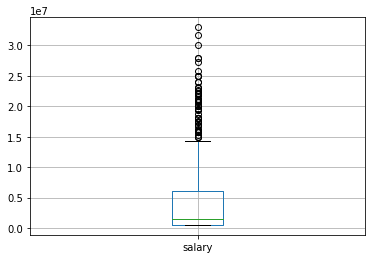

In [0]:
b16=bat2[bat2.yearID == 2016]
b16.boxplot('salary')

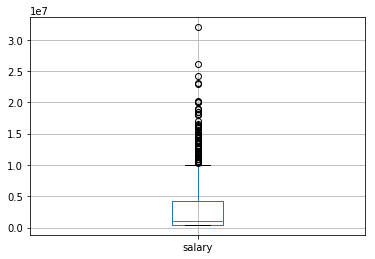

In [0]:
b11=bat2[bat2.yearID == 2011]
b11.boxplot('salary')

(2) 2011년 타자 연봉 상위 5명과 2016년 타자 연봉 상위 5명을 출력하시오.

In [0]:
b11['rank'] = b11.salary.rank(ascending = False)
b11[b11['rank'] <= 5]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


,yearID,teamID_x,lgID_x,playerID,salary,birthYear,birthMonth,birthDay,birthCountry,birthState,birthCity,deathYear,deathMonth,deathDay,deathCountry,deathState,deathCity,nameFirst,nameLast,nameGiven,weight,height,bats,throws,debut,finalGame,retroID,bbrefID,stint,teamID_y,lgID_y,G,AB,R,H,2B,3B,HR,RBI,SB,CS,BB,SO,IBB,HBP,SH,SF,GIDP,rank
23420,2011,MIN,AL,mauerjo01,23000000,1983.0,4.0,19.0,USA,MN,St. Paul,NaN,NaN,NaN,NaN,NaN,NaN,Joe,Mauer,Joseph Patrick,225.0,77.0,L,R,2004-04-05,2018-09-30,mauej001,mauerjo01,1,MIN,AL,82,296,38,85,15,0,3,30.0,0.0,0.0,32,38.0,7.0,3.0,0.0,2.0,9.0,5.0
23601,2011,NYA,AL,rodrial01,32000000,1975.0,7.0,27.0,USA,NY,New York,NaN,NaN,NaN,NaN,NaN,NaN,Alex,Rodriguez,Alexander Enmanuel,230.0,75.0,R,R,1994-07-08,2016-08-12,rodra001,rodrial01,1,NYA,AL,99,373,67,103,21,0,16,62.0,4.0,1.0,47,80.0,1.0,5.0,0.0,3.0,13.0,1.0
23630,2011,NYA,AL,sabatcc01,24285714,1980.0,7.0,21.0,USA,CA,Vallejo,NaN,NaN,NaN,NaN,NaN,NaN,CC,Sabathia,Carsten Charles,300.0,78.0,L,L,2001-04-08,2018-09-27,sabac001,sabatc.01,1,NYA,AL,33,3,0,0,0,0,0,0.0,0.0,0.0,0,1.0,0.0,0.0,0.0,0.0,0.0,3.0
23698,2011,NYA,AL,teixema01,23125000,1980.0,4.0,11.0,USA,MD,Annapolis,NaN,NaN,NaN,NaN,NaN,NaN,Mark,Teixeira,Mark Charles,225.0,75.0,B,R,2003-04-01,2016-10-02,teixm001,teixema01,1,NYA,AL,156,589,90,146,26,1,39,111.0,4.0,1.0,76,110.0,3.0,11.0,0.0,8.0,12.0,4.0
23757,2011,LAA,AL,wellsve01,26187500,1978.0,12.0,8.0,USA,LA,Shreveport,NaN,NaN,NaN,NaN,NaN,NaN,Vernon,Wells,Vernon M.,230.0,73.0,R,R,1999-08-30,2013-09-29,wellv001,wellsve01,1,LAA,AL,131,505,60,110,15,4,25,66.0,9.0,4.0,20,86.0,0.0,1.0,0.0,3.0,8.0,2.0


In [0]:
b16['rank'] = b16.salary.rank(ascending = False)
b16[b16['rank'] <= 5]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


,yearID,teamID_x,lgID_x,playerID,salary,birthYear,birthMonth,birthDay,birthCountry,birthState,birthCity,deathYear,deathMonth,deathDay,deathCountry,deathState,deathCity,nameFirst,nameLast,nameGiven,weight,height,bats,throws,debut,finalGame,retroID,bbrefID,stint,teamID_y,lgID_y,G,AB,R,H,2B,3B,HR,RBI,SB,CS,BB,SO,IBB,HBP,SH,SF,GIDP,rank
27504,2016,DET,AL,cabremi01,28000000,1983.0,4.0,18.0,Venezuela,Aragua,Maracay,NaN,NaN,NaN,NaN,NaN,NaN,Miguel,Cabrera,Jose Miguel,249.0,76.0,R,R,2003-06-20,2018-06-12,cabrm001,cabremi01,1,DET,AL,158,595,92,188,31,1,38,108.0,0.0,0.0,75,116.0,15.0,4.0,0.0,5.0,26.0,4.5
27715,2016,ARI,NL,greinza01,31799030,1983.0,10.0,21.0,USA,FL,Orlando,NaN,NaN,NaN,NaN,NaN,NaN,Zack,Greinke,Donald Zachary,200.0,74.0,R,R,2004-05-22,2018-09-26,greiz001,greinza01,1,ARI,NL,27,52,4,11,1,0,0,3.0,1.0,0.0,3,9.0,0.0,0.0,3.0,2.0,0.0,2.0
27818,2016,LAN,NL,kershcl01,33000000,1988.0,3.0,19.0,USA,TX,Dallas,NaN,NaN,NaN,NaN,NaN,NaN,Clayton,Kershaw,Clayton Edward,228.0,76.0,L,L,2008-05-25,2018-09-29,kersc001,kershcl01,1,LAN,NL,23,46,2,8,1,0,0,3.0,0.0,0.0,1,12.0,0.0,0.0,3.0,0.0,0.0,1.0
28030,2016,BOS,AL,priceda01,30000000,1985.0,8.0,26.0,USA,TN,Murfreesboro,NaN,NaN,NaN,NaN,NaN,NaN,David,Price,David Taylor,215.0,77.0,L,L,2008-09-14,2018-09-26,pricd001,priceda01,1,BOS,AL,35,10,0,0,0,0,0,0.0,0.0,0.0,1,8.0,0.0,0.0,0.0,0.0,0.0,3.0
28240,2016,DET,AL,verlaju01,28000000,1983.0,2.0,20.0,USA,VA,Manakin Sabot,NaN,NaN,NaN,NaN,NaN,NaN,Justin,Verlander,Justin Brooks,225.0,77.0,R,R,2005-07-04,2018-09-29,verlj001,verlaju01,1,DET,AL,34,5,1,1,0,0,0,0.0,0.0,0.0,0,2.0,0.0,0.0,0.0,0.0,0.0,4.5


(3) 2016년 MLB 타자 연봉이 2011년 타자 연봉보다 올랐는지 유의수준 5%에서 검정하시오.

>귀무가설 : b16의 연봉과 b11의 연봉은 같다.

>대립가설 : b16의 연봉과 b11의 연봉이 더 높다.

>유의수준 : 0.05

###분산 동질성 검정

>귀무가설 : b16의 연봉의 분산과 b11의 연봉의 분산은 같다.

>대립가설 : b16의 연봉의 분산과 b11의 연봉의 분산은 다르다. (양측검정)

>유의수준 : 0.05

In [0]:
import scipy
from scipy import stats
scipy.stats.levene(b16['salary'],b11['salary'])

LeveneResult(statistic=15.821288704272627, pvalue=7.299258520980334e-05)

유의확률 유의수준보다 작으므로 귀무가설(등분산) 기각.

In [0]:
from scipy import stats
stats.ttest_ind(b16['salary'],b11['salary'],equal_var=False)

Ttest_indResult(statistic=3.9917680198833536, pvalue=6.908984627159492e-05)

결론 : 유의확률 유의수준보다 작으므로 귀무가설 기각. b16이 더 높다.

#문제2
BAT2(시즌팀이전타자제거),PITCH2(시즌팀이전투수제외)데이터프레임활용

(1) 2016년 MLB 투수 연봉과 2016년 타자 연봉의 차이가 있는지 유의수준 5%에서 검정하시오

>귀무가설 : b16의 연봉과 p16의 연봉은 같다.

>대립가설 : b16의 연봉과 p16의 연봉은 다르다.

>유의수준 : 0.05

In [0]:
b16=bat2[bat2.yearID == 2016]
p16=pitch2[pitch2.yearID == 2016]

###분산 동질성 검정

>귀무가설 : b16의 연봉의 분산과 p16의 연봉의 분산은 같다.

>대립가설 : b16의 연봉의 분산과 p16의 연봉의 분산은 다르다. (양측검정)

>유의수준 : 0.05

In [0]:
import scipy
from scipy import stats
scipy.stats.levene(b16['salary'],p16['salary'])

LeveneResult(statistic=1.8550825346923396, pvalue=0.17347482306477724)

유의확률(0.17)이 유의수준(0.05)보다 크므로 귀무가설(등분산) 채택.

In [0]:
from scipy import stats
stats.ttest_ind(b16['salary'],p16['salary'],equal_var=True)

Ttest_indResult(statistic=1.3733544930466126, pvalue=0.1699245840714432)

결론 : 유의확률(0.17)이 유의수준(0.05)보다 크므로 귀무가설 채택. 

(2) 2016년 MLB 투수 연봉 상위 25%, 2016년 타자 연봉 상위 25% 집단의 투수 연봉과 타자 연봉의 차이가 있는
지 유의수준 5%에서 검정하시오. 

>귀무가설 : b16의 상위 25% = p16의 상위 25%

>대립가설 : b16의 상위 25% != p16의 상위 25%

>유의수준 : 0.05

In [0]:
b16_q2 = b16.quantile(0.25)
p16_q2 = p16.quantile(0.25)

###분산 동질성 검정

>귀무가설 : b16의 상위 25%의 분산과 p16의 상위 25%의 분산은 같다.

>대립가설 : b16의 상위 25%의 분산과 p16의 상위 25%의 분산은 다르다. (양측검정)

>유의수준 : 0.05

In [0]:
import scipy
from scipy import stats
scipy.stats.levene(b16_q2,p16_q2)

LeveneResult(statistic=0.03292585272314886, pvalue=0.8566025090892337)

유의확률(0.86)이 유의수준(0.05)보다 크므로 귀무가설(등분산) 채택.

In [0]:
from scipy import stats
stats.ttest_ind(b16_q2,p16_q2,equal_var=True)

Ttest_indResult(statistic=0.18142262407478782, pvalue=0.8566276722957702)

결론 : 유의확률(0.86)이 유의수준(0.05)보다 크므로 귀무가설 채택.

#문제3
BAT2(시즌팀이전타자제거),PITCH2(시즌팀이전투수제외)데이터프레임활용

(1) 2016년 타자 연봉 데이터 활용하여 우타자와 좌타자(키변수=bats)의 연봉 차이가 있는지 유의수준 5%에서 검
정하시오. 

>귀무가설 : b16의 bats R의 연봉과 p16의 bats L의 연봉은 같다.

>대립가설 : b16의 bats R의 연봉과 p16의 bats L의 연봉은 다르다.

>유의수준 : 0.05

In [0]:
b16_r = b16[b16.bats == 'R']
b16_l = b16[b16.bats == 'L']

###분산 동질성 검정

>귀무가설 : b16_r의 분산과 b16_l의 분산은 같다.

>대립가설 : b16_r의 분산과 b16_l의 분산은 다르다. (양측검정)

>유의수준 : 0.05

In [0]:
import scipy
from scipy import stats
scipy.stats.levene(b16_r.salary,b16_l.salary)

LeveneResult(statistic=2.058553759562021, pvalue=0.15181759324853458)

유의확률(0.15)이 유의수준(0.05)보다 크므로 귀무가설(등분산) 채택.

In [0]:
from scipy import stats
stats.ttest_ind(b16_r.salary,b16_l.salary,equal_var=True)

Ttest_indResult(statistic=-1.5161562912342745, pvalue=0.12994867810426353)

결론 : 유의확률(0.12)이 유의수준(0.05)보다 크므로 귀무가설 채택.

(2) 2016년 투수 연봉 데이터 활용하여 우투수와 좌투수(키변수=throws)의 연봉 차이가 있는지 유의수준 5%에서
검정하시오. 

>귀무가설 : b16의 throws R의 연봉과 p16의 throws L의 연봉은 같다.

>대립가설 : b16의 throws R의 연봉과 p16의 throws L의 연봉은 다르다.

>유의수준 : 0.05

In [0]:
b16_tr = b16[b16.throws == 'R']
b16_tl = b16[b16.throws == 'L']

###분산 동질성 검정

>귀무가설 : b16_tr의 분산과 b16_tl의 분산은 같다.

>대립가설 : b16_tr의 분산과 b16_tl의 분산은 다르다. (양측검정)

>유의수준 : 0.05

In [0]:
import scipy
from scipy import stats
scipy.stats.levene(b16_tr.salary,b16_tl.salary)

LeveneResult(statistic=4.602893736389538, pvalue=0.03224954238681579)

유의확률(0.03)이 유의수준(0.05)보다 작으므로 귀무가설(등분산) 기각.

In [0]:
from scipy import stats
stats.ttest_ind(b16_tr.salary,b16_tl.salary,equal_var=False)

Ttest_indResult(statistic=-2.0299376162610554, pvalue=0.043906852227398256)

결론 : 유의확률(0.04)이 유의수준(0.05)보다 작으므로 귀무가설 기각.

#문제4
BAT2(시즌팀이전타자제거),PITCH2(시즌팀이전투수제외)데이터프레임활용

(1) 2016년 MLB 타자 연봉 100만불 이상인 선수 비율과 2016년 MLB 투수 연봉 100만불 선수 비율을 구하시오. 

In [0]:
pb16hat = b16[b16['salary']>1000000].shape[0]/b16.shape[0]
pp16hat = p16[p16['salary']>1000000].shape[0]/p16.shape[0]

In [0]:
print('MLB 타자 연봉 100만불 이상인 선수 비율 = %.2f 2016년 MLB 투수 연봉 100만불 선수 비율 = %.2f' %(pb16hat, pp16hat))

MLB 타자 연봉 100만불 이상인 선수 비율 = 0.55 2016년 MLB 투수 연봉 100만불 선수 비율 = 0.52


(2) 2016년 MLB 타자 연봉 100만불 이상인 선수 비율과 2016년 MLB 투수 연봉 100만불 선수 비율의 차이가 있
는지 유의수준 5%에서 검정하시오. 

>귀무가설 : MLB 타자 연봉 100만불 이상인 선수 비율과 2016년 MLB 투수 연봉 100만불 선수 비율은 같다.

>대립가설 : MLB 타자 연봉 100만불 이상인 선수 비율과 2016년 MLB 투수 연봉 100만불 선수 비율은 다르다.

>유의수준 : 0.05

In [0]:
import numpy as np
TS = (pb16hat - pp16hat)/np.sqrt(pb16hat*(1-pb16hat)/b16.shape[0]+pp16hat*(1-pp16hat)/p16.shape[0])
from scipy.stats import norm
print('검정통계량 = %.2f 유의확률 = %.2f' %(TS, 1- norm.cdf(TS)))

검정통계량 = 0.88 유의확률 = 0.19


결론 : 유의확률(0.19)이 유의수준(0.05)보다 크므로 귀무가설 채택.

#문제5
직접(direct) 투자한 사람들의 수익률과 투자전문가(broker)를 활용하는 사람들의 수익율을 조사한 데이터이다. 결
측치가 존재하므로 df.dropna(inplace=True) 사용한 후 검정하시오. 

In [0]:
df =pd.read_csv('http://wolfpack.hnu.ac.kr/Stat_Notes/elem_stat/BE_DA/mutual.csv')
df.dropna(inplace=True)

(1) 직접 투자자와 간접 투자자들의 수익율 평균의 차이가 있는지 유의수준 5%에서 검정하시오. 

>귀무가설 : 직접 투자자 수익율 평균과 간접 투자자 수익율 평균은 같다.

>대립가설 : 직접 투자자 수익율 평균과 간접 투자자 수익율 평균은 다르다.

>유의수준 : 0.05

In [0]:
df.head(3)

,Direct,Broker
0,9.33,3.24
1,6.94,-6.76
2,16.17,12.80


###분산 동질성 검정

>귀무가설 : 직접 투자자 수익율 분산과 간접 투자자 수익율 분산은 같다.

>대립가설 : 직접 투자자 수익율 분산과 간접 투자자 수익율 분산은 다르다.

>유의수준 : 0.05

In [0]:
import scipy
from scipy import stats
scipy.stats.levene(df.Direct,df.Broker)

LeveneResult(statistic=0.2981270949877738, pvalue=0.5863805628532334)

유의확률(0.58)이 유의수준(0.05)보다 크므로 귀무가설(등분산) 채택.

In [0]:
from scipy import stats
stats.ttest_ind(df.Direct,df.Broker,equal_var=True)

Ttest_indResult(statistic=2.242152364848839, pvalue=0.027354609220115237)

결론 : 유의확률(0.02)이 유의수준(0.05)보다 작으므로 귀무가설 기각.


(2) 수익이 난 비율(수익율 0% 초과)이 직접투자와 간접투자의 차이가 있는지 유의수준 5%에서 검정하시오.

>귀무가설 : 직접투자의 수익이 난 비율(수익율 0% 초과)과 간접 투자의 수익이 난 비율(수익율 0% 초과)은 같다.

>대립가설 : 직접투자의 수익이 난 비율(수익율 0% 초과)과 간접 투자의 수익이 난 비율(수익율 0% 초과)은 다르다.

>유의수준 : 0.05

In [0]:
p1hat = df[df.Direct>0].shape[0]/df.Direct.shape[0]
p2hat = df[df.Broker>0].shape[0]/df.Broker.shape[0]

In [0]:
import numpy as np
TS = (p1hat - p2hat)/np.sqrt(p1hat*(1-p1hat)/df.Direct.shape[0]+p2hat*(1-p2hat)/df.Broker.shape[0])
from scipy.stats import norm
print('검정통계량 = %.2f 유의확률 = %.2f' %(TS, 1-norm.cdf(TS)))

검정통계량 = 2.29 유의확률 = 0.01


결론 : 유의확률(0.02)이 유의수준(0.05)보다 작으므로 귀무가설 기각.

#문제6

비누 회사에서 포장지 디자인을 2개(A, B) 개발하였다. 고객들이 어느 디자인을 선호하는지 알아보기 위 하여 자회
사 비누 판매율이 비슷한 두 수퍼마켓(1에는 디자인 A, 2에는 디자인 B 출하)을 임의 선택하여, 수퍼마켓에 각각 서
로 다른 디자인 비누를 진열하여 판매비율을 조사한 데이터이다. 이 회사 비누의 바 코드 “9077”이다. 데이터에는
각 슈퍼마켓에서 팔린 비누의 코드가 있다. 수퍼마켓 1, 2를 이용하는 고객의 비누 관련 성향은 동일하다. 

In [0]:
import pandas as pd
df0 = pd.read_csv('http://wolfpack.hnu.ac.kr/Stat_Notes/elem_stat/Stat_methods/package.csv')
df0.dropna(inplace=True)
print(df0.columns,'\n',df.shape)

Index(['Supermarket 1', 'Supermarket 2'], dtype='object') 
 (47, 2)


In [0]:
df0.head()

,Supermarket 1,Supermarket 2
0,4255.0,4255
1,4255.0,9077
2,4255.0,8855
3,8855.0,9077
4,7118.0,8855


In [0]:
df0['Supermarket 1'].value_counts('9077')

8855.0    0.269912
4255.0    0.241150
9077.0    0.199115
7118.0    0.180310
3745.0    0.109513
Name: Supermarket 1, dtype: float64

(1) 디자인 A 비누, 디자인 B 비누에 대한 각각의 고객 선호비율 95%신뢰구간을 구하시오. 

귀무가설 : 디자인 A 비누, 디자인 B 비누에 대한 각각의 고객 선호비율은 같다.

대립가설 : 디자인 A 비누, 디자인 B 비누에 대한 각각의 고객 선호비율은 다르다.

유의수준 : 0.05

In [0]:
p1hat = df0[df0['Supermarket 1']==9077].value_count()/47
print('다이어트효과 이유 구입 비율 = %.1f%%이다.' %(p1hat[]*100))

SyntaxError: ignored

(2) 고객은 디자인 A, 디자인 B 중 어느 포장지를 선호하는지 유의수준 5%에서 검정하시오. 

귀무가설 : 디자인 A 비누, 디자인 B 비누에 대한 각각의 고객 선호는 같다.

대립가설 : 디자인 A 비누, 디자인 B 비누에 대한 각각의 고객 선호는 다르다.

유의수준 : 0.05

In [0]:
p1hat = df0[df0['Supermarket 1']==9077].shape[0]/df0['Supermarket 1'].shape[0]
p2hat = df0[df0['Supermarket 2']==9077].shape[0]/df0['Supermarket 2'].shape[0]

In [0]:
import numpy as np
TS = (p1hat - p2hat)/np.sqrt(p1hat*(1-p1hat)/47+p2hat*(1-p2hat)/47)
from scipy.stats import norm
print('검정통계량 = %.2f 유의확률 = %.2f' %(TS, 1-norm.cdf(TS)))

검정통계량 = 0.53 유의확률 = 0.30


결론 : 유의확률(0.30)이 유의수준(0.05)보다 크므로 귀무가설 채택.